In [125]:
import numpy as np
import pandas as pd
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
%matplotlib inline

from datetime import datetime
import time
import csv
sns.set_style("darkgrid")
results_2019 = pd.read_csv('./Runners_all_results_2019.csv', header = 0, encoding='latin-1', error_bad_lines=False)
results_2019['OfficialTime'] = results_2019['OfficialTime'].apply(lambda x: datetime.combine(datetime.min, datetime.strptime(x, '%H:%M:%S').time()) - datetime.min)
results_2019.head(2)

b'Skipping line 26144: expected 20 fields, saw 21\n'


,BibNumber,FullName,SortName,AgeOnRaceDay,Gender,City,StateAbbrev,StateName,Zip,CountryOfResAbbrev,CountryOfResName,CountryOfCtzAbbrev,CountryOfCtzName,OfficialTime,RankOverall,RankOverGender,RankOverDivision,EventGroup,SubGroupLabel,SubGroup
0,2,Lawrence Cherono,"Cherono, Lawrence",30,M,Eldoret,NaN,NaN,NaN,KEN,Kenya,KEN,Kenya,02:07:57,1,1,1,Runners,NaN,NaN
1,6,Lelisa Desisa,"Desisa, Lelisa",29,M,Ambo,NaN,NaN,NaN,ETH,Ethiopia,ETH,Ethiopia,02:07:59,2,2,2,Runners,NaN,NaN


In [126]:
results_2019.Gender[results_2019.Gender == 'M'] = 1
results_2019.Gender[results_2019.Gender == 'F'] = 0
results_2019.head(1)

/home/micha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/micha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,BibNumber,FullName,SortName,AgeOnRaceDay,Gender,City,StateAbbrev,StateName,Zip,CountryOfResAbbrev,CountryOfResName,CountryOfCtzAbbrev,CountryOfCtzName,OfficialTime,RankOverall,RankOverGender,RankOverDivision,EventGroup,SubGroupLabel,SubGroup
0,2,Lawrence Cherono,"Cherono, Lawrence",30,1,Eldoret,NaN,NaN,NaN,KEN,Kenya,KEN,Kenya,02:07:57,1,1,1,Runners,NaN,NaN


In [127]:
import numpy as np
import pandas as pd
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
%matplotlib inline

from datetime import datetime
import time
import csv
sns.set_style("darkgrid")
results_2019 = pd.read_csv('./Runners_all_results_2019.csv', header = 0, encoding='latin-1', error_bad_lines=False)
results_2019['OfficialTime'] = results_2019['OfficialTime'].apply(lambda x: datetime.combine(datetime.min, datetime.strptime(x, '%H:%M:%S').time()) - datetime.min)
results_2019['OfficialTime'] = results_2019['OfficialTime'].apply(lambda x: x.total_seconds()/3600)

results_2019.head(2)

b'Skipping line 26144: expected 20 fields, saw 21\n'


,BibNumber,FullName,SortName,AgeOnRaceDay,Gender,City,StateAbbrev,StateName,Zip,CountryOfResAbbrev,CountryOfResName,CountryOfCtzAbbrev,CountryOfCtzName,OfficialTime,RankOverall,RankOverGender,RankOverDivision,EventGroup,SubGroupLabel,SubGroup
0,2,Lawrence Cherono,"Cherono, Lawrence",30,M,Eldoret,NaN,NaN,NaN,KEN,Kenya,KEN,Kenya,2.132500,1,1,1,Runners,NaN,NaN
1,6,Lelisa Desisa,"Desisa, Lelisa",29,M,Ambo,NaN,NaN,NaN,ETH,Ethiopia,ETH,Ethiopia,2.133056,2,2,2,Runners,NaN,NaN


In [128]:
results_2019 = results_2019[['AgeOnRaceDay', 'Gender', 'CountryOfResName', 'OfficialTime', 'RankOverall']]
results_2019.Gender[results_2019.Gender == 'M'] = 1
results_2019.Gender[results_2019.Gender == 'F'] = 0
results_2019.head(2)


/home/micha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,AgeOnRaceDay,Gender,CountryOfResName,OfficialTime,RankOverall
0,30,1,Kenya,2.132500,1
1,29,1,Ethiopia,2.133056,2


### Exploratory analysis

In [129]:
results_2019.describe()

,AgeOnRaceDay,OfficialTime,RankOverall
count,26656.000000,26656.000000,26656.000000
mean,42.800720,3.883913,13328.519283
std,11.537728,0.750799,7695.101480
min,18.000000,2.132500,1.000000
25%,34.000000,3.340486,6664.750000
50%,43.000000,3.759444,13328.500000
75%,51.000000,4.316667,19992.250000
max,83.000000,7.730000,26657.000000


dane w pandas - describe
średnia bliska zeru ^-16 - dane ustandaryzowane
rozrzut przeskalowany - nie równy 1
czyli dane ustandaryzowany

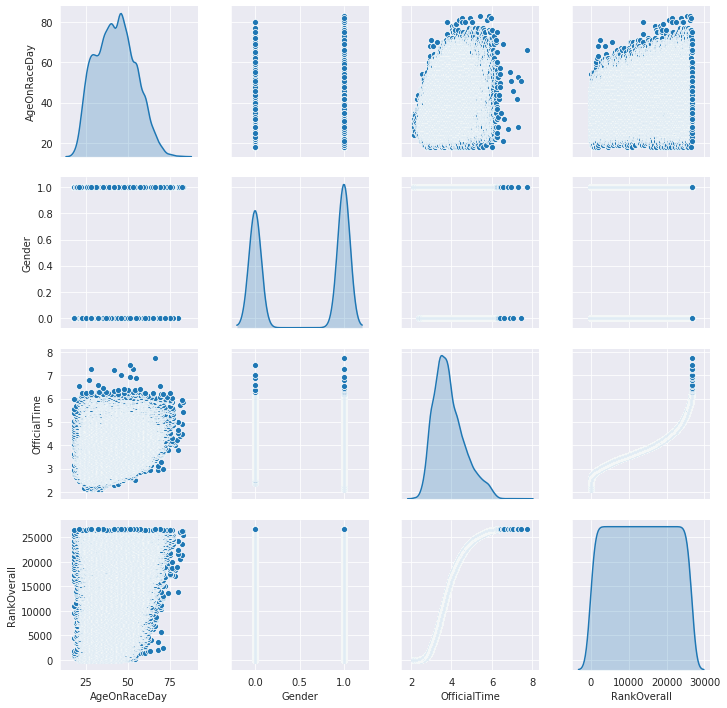

In [130]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sb

sb.pairplot(results_2019, diag_kind="kde")

# Wykres typu pairplot pozwala na zaobserwowanie korelacji między parami danych

/home/micha/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/micha/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/micha/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/micha/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


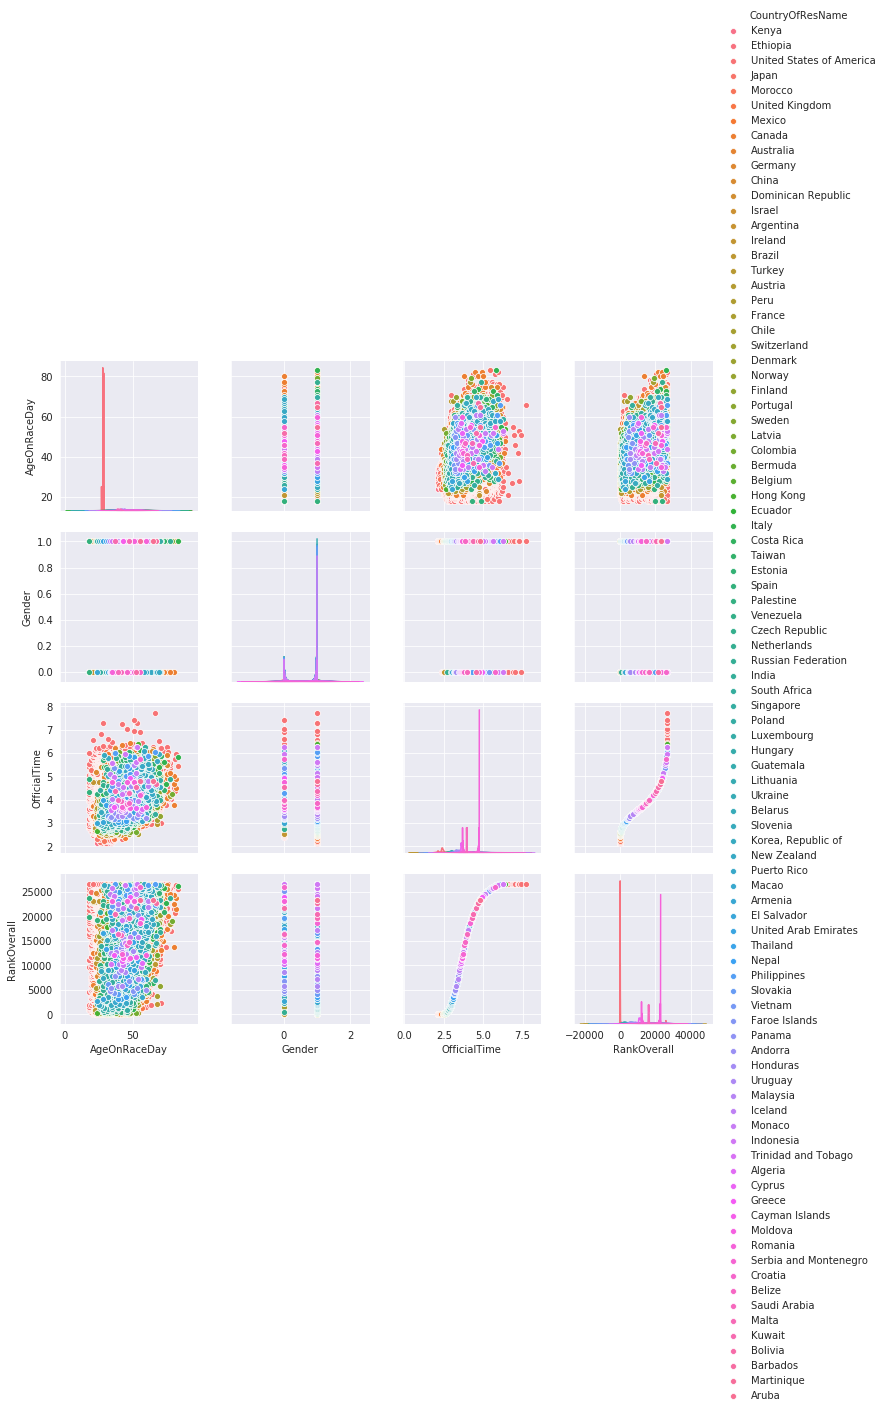

In [131]:
sb.pairplot(results_2019, diag_kind="kde", hue="CountryOfResName")
#tu dodatkowo z naniesionym krajem pochodzenia

### Data standardisation with [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [132]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(results_2019[['AgeOnRaceDay','Gender']])
# scaled_data = scaler.fit_transform(results_2019[['AgeOnRaceDay','Gender']])


### Data split into train and test batches with [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) method

In [133]:
from sklearn.model_selection import train_test_split
x = results_2019[['OfficialTime']]
x = x.to_numpy()
y = results_2019[['RankOverall']]
y = y.to_numpy()

train_data, test_data, \
train_target, test_target = \
train_test_split(x,y, test_size=0.1)

In [134]:
#train test split przyjmuje parametry: dane, targety, rozmiar zbioru testowego

In [135]:
print("Training dataset:")
print("patients_train_data:", train_data.shape)
print("patients_train_target:", train_target.shape)

Training dataset:
patients_train_data: (23990, 1)
patients_train_target: (23990, 1)


In [136]:
print("Testing dataset:")
print("patients_test_data:", test_data.shape)
print("patients_test_target:", test_target.shape)

Testing dataset:
patients_test_data: (2666, 1)
patients_test_target: (2666, 1)


### Training [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) model

In [137]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(train_data, train_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Using trained model

In [138]:
id=1
linear_regression_prediction = linear_regression.predict(test_data[id,:].reshape(1,-1))

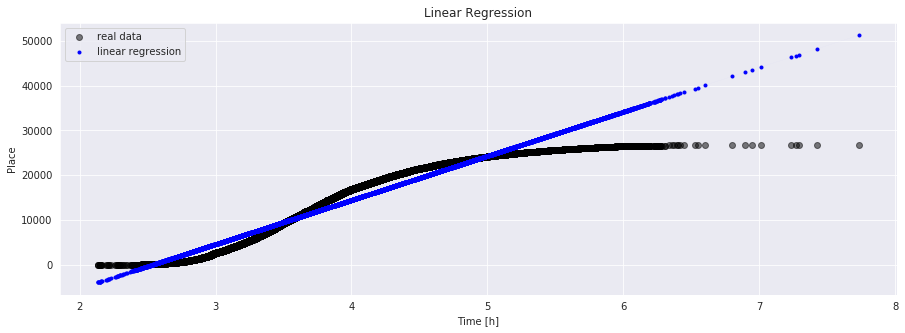

In [139]:
linear_regression_predictions = linear_regression.predict(x)
linear_regression_predictions

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(x, y, 'o', label="real data", c = 'black', alpha=0.5)                       # plot given data
ax.plot(x, linear_regression_predictions, 'b--.', label="linear regression", linewidth=0.01) # plot predictions
# ax.plot(X_true, iv_u, 'r--', label='std', linewidth=3)                                # plot std deviations
# ax.plot(X_true, iv_l, 'r--', linewidth=3)
ax.set_title('Linear Regression')
ax.set_xlabel('Time [h]')
ax.set_ylabel('Place')
ax.legend(loc='best')
plt.show()

#regresja liniowa - przewidywanie miejsca jakie zajął biegacz na podstawie uzyskanego czasu

In [140]:
print("Model predicted for participant {0} value {1}".format(id, linear_regression_prediction))

Model predicted for participant 1 value [[2873.38908852]]


In [141]:
print("Real value for participant \"{0}\" is {1}".format(id, test_target[id]))

Real value for participant "1" is [1028]


In [142]:
print('Coefficients of a learned model: \n', linear_regression.coef_)

Coefficients of a learned model: 
 [[9857.23960208]]


### Model evaluation

In [143]:
from sklearn.metrics import mean_squared_error
print("Mean squared error of a learned model: %.2f" %
      mean_squared_error(test_target, linear_regression.predict(test_data)))

Mean squared error of a learned model: 4293947.18


Determining [Coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination) with [r2_score()](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)

In [144]:
from sklearn.metrics import r2_score
print('Variance score: %.2f' % r2_score(test_target, linear_regression.predict(test_data)))

Variance score: 0.93


### Model evaluation with [cross-validation](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)

fig. cross-validation (https://en.wikipedia.org/wiki/Cross-validation_(statistics))

##### kroswalidacja
dane dzielimy na trenigowe i testowe wiele razy - otrzymujemy model i testujemy za każdym razem (zazwyczaj 4 "foldy")
chcemy określić jak nasz model relizuje fenomen który jest w danych
pozwala pokazać czy regresja linowa daje zadowalajace wyniki

In [145]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LinearRegression(), results_2019[['AgeOnRaceDay','Gender']],results_2019[['RankOverall']], cv=4)
print(scores)

[-40.37952549  -7.65303706  -4.45027349 -40.41243217]


### [Lasso regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) model. A Model with [regularization](https://en.wikipedia.org/wiki/Regularization_(mathematics)

In [146]:
from sklearn.linear_model import Lasso
lasso_regression = Lasso(alpha=0.6)
lasso_regression.fit(train_data, train_target)
score = lasso_regression.score(test_data, test_target) #r2 score
print("Lasso regression variance score: %.2f" % score)

Lasso regression variance score: 0.93
